In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
np.random.seed(123)  # Set seed for reproducibility

# Generate ID, Group, Feature_1, Feature_2, Feature_3
n_samples = 800
id_values = ['ID{:03}'.format(i) for i in range(1, n_samples + 1)]
groups = np.random.choice(['A', 'B', 'C'], n_samples)
feature_1 = np.random.normal(2500, 100, n_samples)
feature_2 = np.random.normal(400, 15, n_samples)

# Calculate Feature_3 based on Group
feature_3 = np.where(groups == 'A', 3 * feature_1 - 5 * feature_2,
                     np.where(groups == 'B', 2 * feature_1,
                              -(feature_1) + feature_2))

# Add noise to Feature_3
feature_3 += np.random.normal(0, 12, n_samples)

data = {'ID': id_values, 'Group': groups, 'Feature_1': feature_1,
        'Feature_2': feature_2, 'Feature_3': feature_3}

df = pd.DataFrame(data)

In [24]:
expected_samples_gt_3000 = len(df[df['Feature_1'] > 3000])
print(f"Expected samples with Feature_1 > 3000: {expected_samples_gt_3000}")

Expected samples with Feature_1 > 3000: 0


In [17]:
actual_samples_gt_3000 = sum(df['Feature_1'] > 3000)
print(f"Actual samples with Feature_1 > 3000: {actual_samples_gt_3000}")

Actual samples with Feature_1 > 3000: 0


In [18]:
group_stats = df.groupby('Group')['Feature_3'].agg(['mean', 'std'])
print(group_stats)

              mean         std
Group                         
A      5498.970059  304.102801
B      4994.569529  208.722920
C     -2108.822685  107.506826


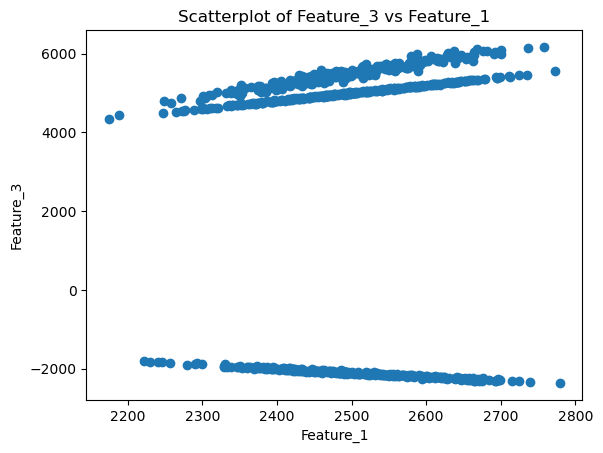

In [19]:
plt.scatter(df['Feature_1'], df['Feature_3'])
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.title('Scatterplot of Feature_3 vs Feature_1')
plt.show()

In [20]:
df.to_csv('fake_data.csv', index=False)

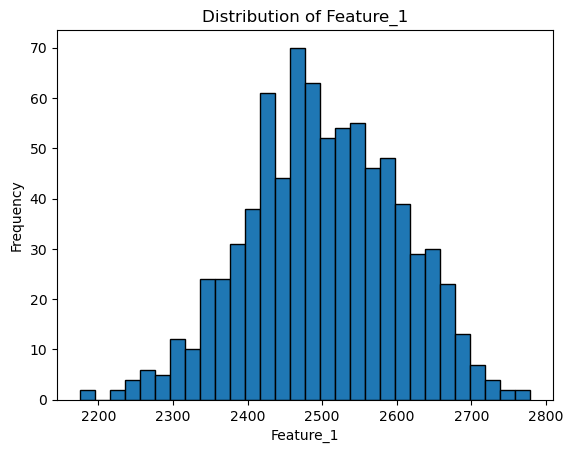

In [21]:
plt.hist(df['Feature_1'], bins=30, edgecolor='black')
plt.xlabel('Feature_1')
plt.ylabel('Frequency')
plt.title('Distribution of Feature_1')
plt.show()